# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Syfa Oktapiani
- Email: faosyfacip@gmail.com
- Id Dicoding: syfa_oktapiani02

## Persiapan

### Memuat library yang akan digunakan

In [85]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV

## Data Understanding

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |
| Curricular units 1st sem (grade)| Grade average in the 1st semester (between 0 and 20) |
| Curricular units 1st sem (without evaluations)| Number of curricular units without evalutions in the 1st semester |
| Unemployment rate| Unemployment rate (%) |
| Inflation rate| Inflation rate (%) |
| GDP | GDP |
| Target | Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course |

In [61]:
df = pd.read_csv('data.csv', delimiter=';')

# Menampilkan lima data teratas
df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

Menampilkan Baris Data Terakhir

In [62]:
df.tail()

Marital_status  Application_mode  Application_order  Course  \
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous_qualification_grade  Nacionality  Mothers_qualification  \
4419                         125.0            1                      1   
4420                         120.0          105                      1   
4421                         154.0            1                     37   
4422                         180.0            1                     37   
4423                         152.0           22                     38   

      Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
4419                      1  ...                                  0   
4420                      1  ...                                  0   
4421                     37  ...                                  0   
4422                     37  ...                                  0   
4423                     37  ...                                  0   

      Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
4419                                  6                                     8   
4420                                  6                                     6   
4421                                  8                                     9   
4422                                  5                                     6   
4423                                  6                                     6   

      Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
4419                                  5                       12.666667   
4420                                  2                       11.000000   
4421                                  1                       13.500000   
4422                                  5                       12.000000   
4423                                  6                       13.000000   

      Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
4419                                             0               15.5   
4420                                             0               11.1   
4421                                             0               13.9   
4422                                             0                9.4   
4423                                             0               12.7   

      Inflation_rate   GDP    Status  
4419             2.8 -4.06  Graduate  
4420             0.6  2.02   Dropout  
4421            -0.3  0.79   Dropout  
4422            -0.8 -3.12  Graduate  
4423             3.7 -1.70  Graduate  

[5 rows x 37 columns]

Mengekstrak ringkasan struktur dataset dengan fungsi info()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Hasil output kode menunjukkan bahwa dataset terdiri dari 4424 baris dan 37 kolom, tanpa adanya nilai yang hilang, serta seluruh kolom telah memiliki tipe data yang sesuai.

Menyajikan ringkasan statistik deskriptif dari data

In [64]:
# Menampilkan statistik deskriptif data
df.describe(include='all')

Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  4424.000000             4424.000000   
unique                         NaN                     NaN   
top                            NaN                     NaN   
freq                           NaN                     NaN   
mean                      0.890823                4.577758   
std                       0.311897               10.216592   
min                       0.000000                1.000000   
25%                       1.000000                1.000000   
50%                       1.000000                1.000000   
75%                       1.000000                1.000000   
max                       1.000000               43.000000   

        Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                    4424.000000  4424.000000            4424.000000   
unique                           NaN          NaN                    NaN   
top                              NaN          NaN                    NaN   
freq                             NaN          NaN                    NaN   
mean                      132.613314     1.873192              19.561935   
std                        13.188332     6.914514              15.603186   
min                        95.000000     1.000000               1.000000   
25%                       125.000000     1.000000               2.000000   
50%                       133.100000     1.000000              19.000000   
75%                       140.000000     1.000000              37.000000   
max                       190.000000   109.000000              44.000000   

        Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
count             4424.000000  ...                        4424.000000   
unique                    NaN  ...                                NaN   
top                       NaN  ...                                NaN   
freq                      NaN  ...                                NaN   
mean                22.275316  ...                           0.541817   
std                 15.343108  ...                           1.918546   
min                  1.000000  ...                           0.000000   
25%                  3.000000  ...                           0.000000   
50%                 19.000000  ...                           0.000000   
75%                 37.000000  ...                           0.000000   
max                 44.000000  ...                          19.000000   

        Curricular_units_2nd_sem_enrolled  \
count                         4424.000000   
unique                                NaN   
top                                   NaN   
freq                                  NaN   
mean                             6.232143   
std                              2.195951   
min                              0.000000   
25%                              5.000000   
50%                              6.000000   
75%                              7.000000   
max                             23.000000   

        Curricular_

Output dari kode menunjukkan bahwa tidak ditemukan data yang tidak wajar. Meskipun terdapat perbedaan nilai yang cukup besar pada kolom course, seperti antara 33 dan 9991, nilai-nilai tersebut sebenarnya valid jika merujuk pada deskripsi data, di mana 33 merepresentasikan Biofuel Production Technologies dan 9991 merepresentasikan Management.










Penanganan Nilai yang Hilang

In [65]:
# Melakukan cek terhadap kolom mana saja yang memiliki value Null
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Membuat DataFrame untuk menampilkan kolom yang memiliki nilai null beserta tipe datanya
nan_info = pd.DataFrame({
    'Tipe Data': df[columns_with_nan].dtypes,
    'Jumlah Null': df[columns_with_nan].isnull().sum()
})

print("Kolom yang memiliki nilai Null beserta tipe datanya:")
print(nan_info)

Kolom yang memiliki nilai Null beserta tipe datanya:
Empty DataFrame
Columns: [Tipe Data, Jumlah Null]
Index: []


Hasil output menunjukkan bahwa tidak terdapat kolom dengan nilai yang hilang, sehingga tidak dibutuhkan proses penanganan lanjutan.

### Univariate Analysis

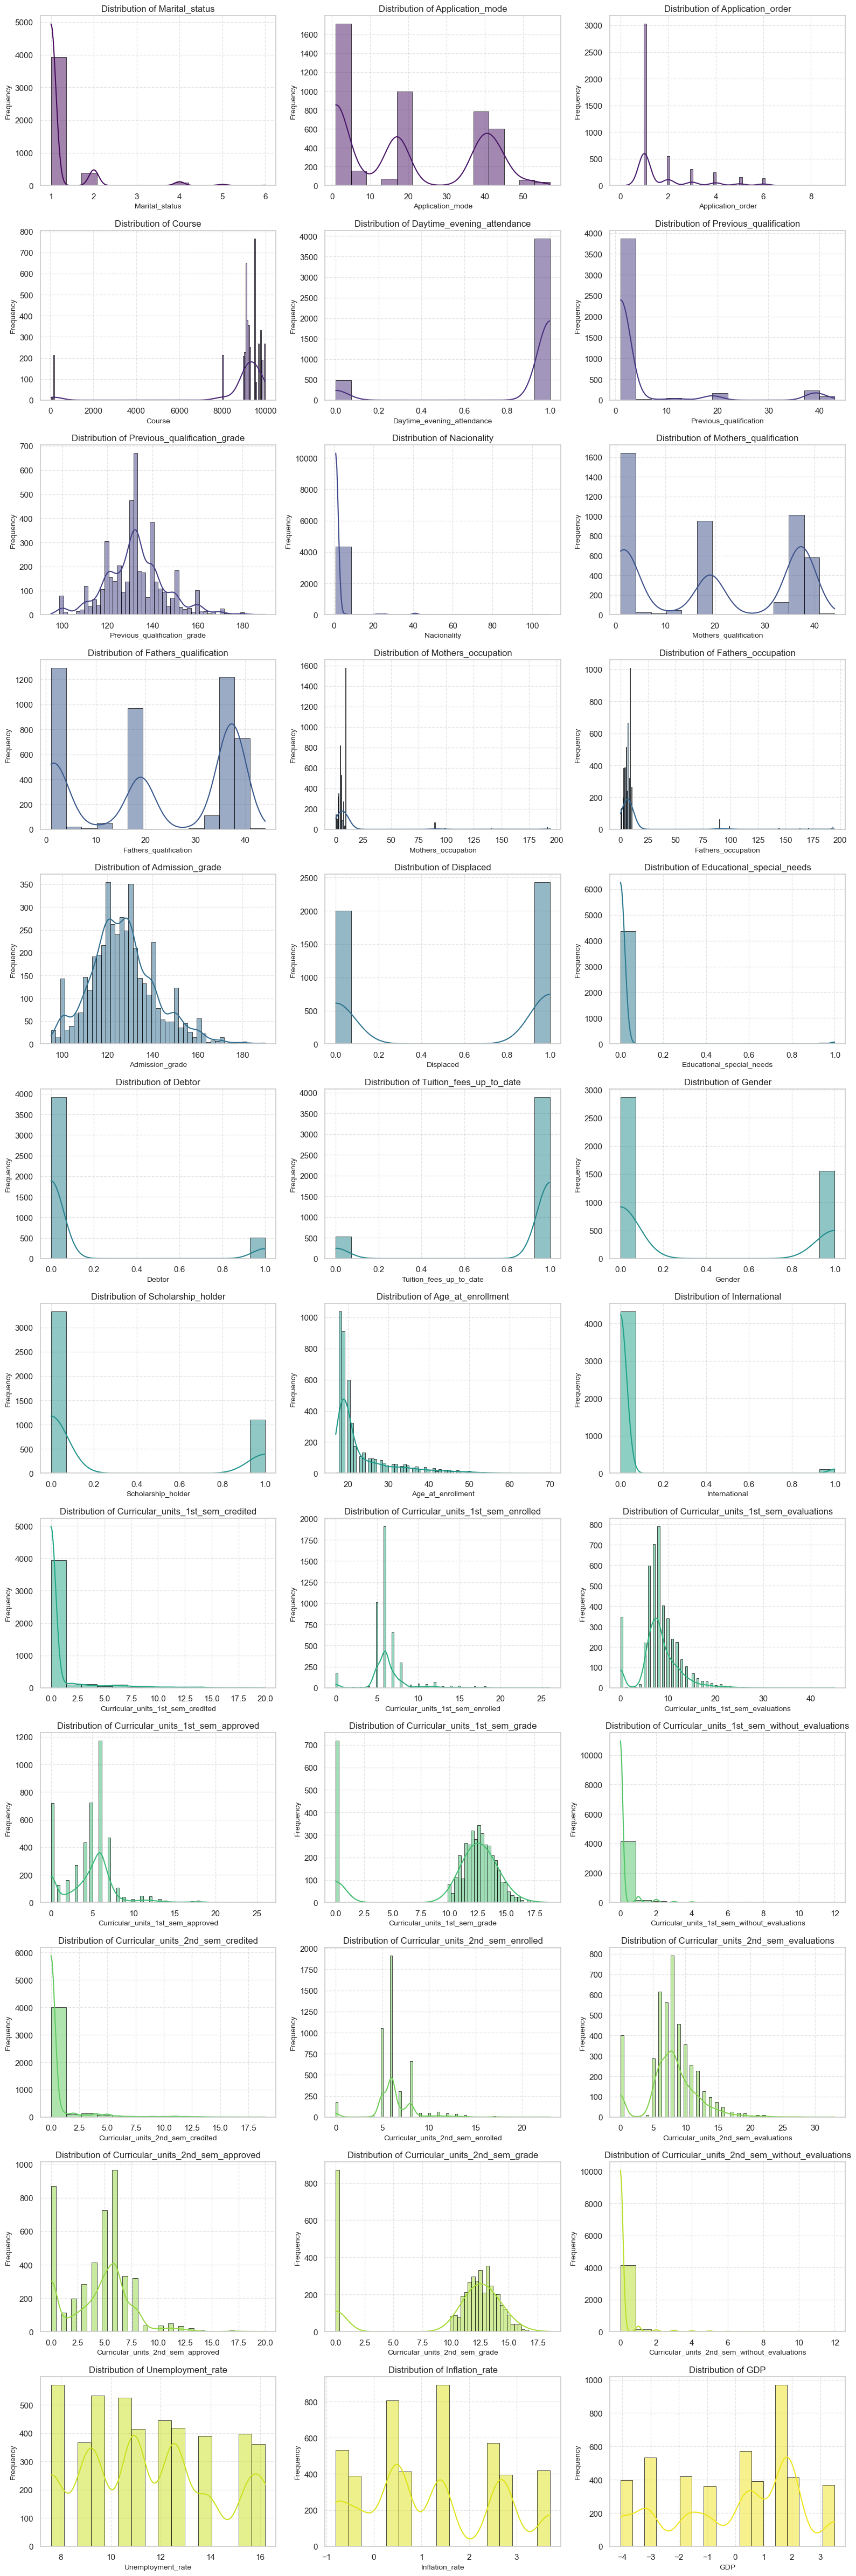

In [66]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set style seaborn
sns.set(style="whitegrid")

# Warna gradient atau palet warna yang kontras
color_palette = sns.color_palette("viridis", len(numerical_columns))

# Univariate analysis dengan styling lebih modern
plt.figure(figsize=(16, 4 * ((len(numerical_columns) - 1) // 3 + 1)))  # Dinamis berdasarkan jumlah kolom
for i, col in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) - 1) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde=True, color=color_palette[i % len(color_palette)], edgecolor='black', linewidth=0.5)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Hasil dari kode tersebut menunjukkan bahwa tidak terlihat pola yang menonjol, kemungkinan karena sebagian besar data terdiri dari kolom kategorikal yang direpresentasikan dengan nilai numerik, seperti pada kolom Marital Status, Application Mode, dan beberapa kolom lainnya.

Analisis Univariat pada Fitur Kategorikal

C:\Users\Ega\AppData\Local\Temp\ipykernel_17792\4198219796.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=palette, edgecolor='black')
C:\Users\Ega\AppData\Local\Temp\ipykernel_17792\4198219796.py:15: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df, x=col, palette=palette, edgecolor='black')


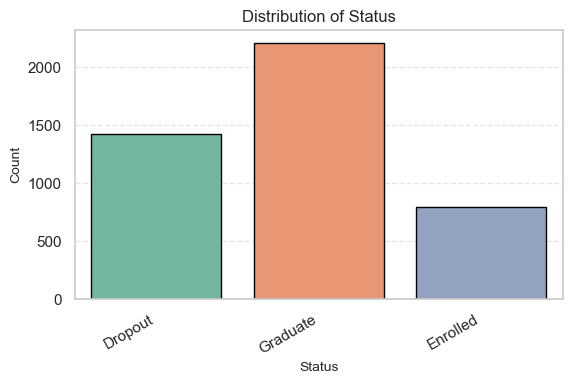

In [67]:
# Identifikasi kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Set style visualisasi
sns.set(style="whitegrid")

# Warna berbeda untuk setiap subplot
color_palettes = ['Set2', 'Set3', 'Pastel1', 'Dark2', 'tab10', 'Accent']

# Ukuran figure dinamis
plt.figure(figsize=(16, 4 * ((len(categorical_columns) - 1) // 3 + 1)))
for i, col in enumerate(categorical_columns):
    plt.subplot((len(categorical_columns) - 1) // 3 + 1, 3, i + 1)
    palette = sns.color_palette(color_palettes[i % len(color_palettes)])
    sns.countplot(data=df, x=col, palette=palette, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Berdasarkan output kode, kolom status terdiri dari tiga kategori: dropout, graduate, dan enrolled. Dari ketiganya, kategori graduate memiliki jumlah terbanyak, yaitu lebih dari 2000, disusul oleh dropout, dan yang paling sedikit adalah enrolled.

### Multivariate Analysis

Analisis multivariat difokuskan pada kolom target, yaitu status. Pada tahap ini, kolom-kolom kategorikal yang memiliki representasi numerik, seperti marital status, dipilih. Nilai numerik tersebut kemudian diubah kembali ke bentuk kategorikal aslinya (misalnya, nilai 1 pada marital status menjadi 'single') agar memudahkan interpretasi tanpa mengubah data asli dalam dataset.

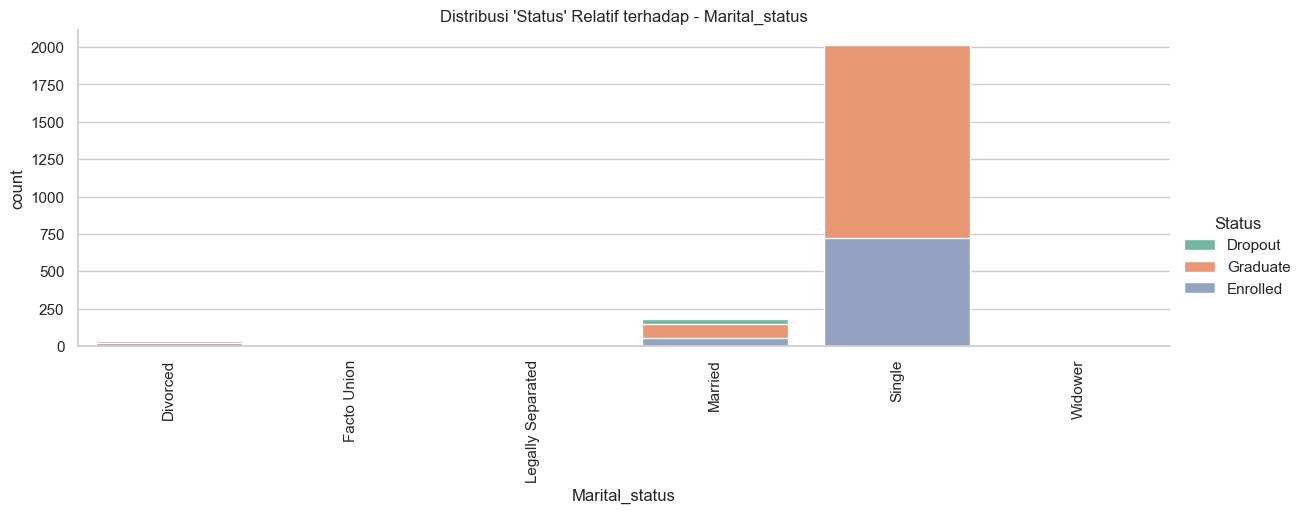

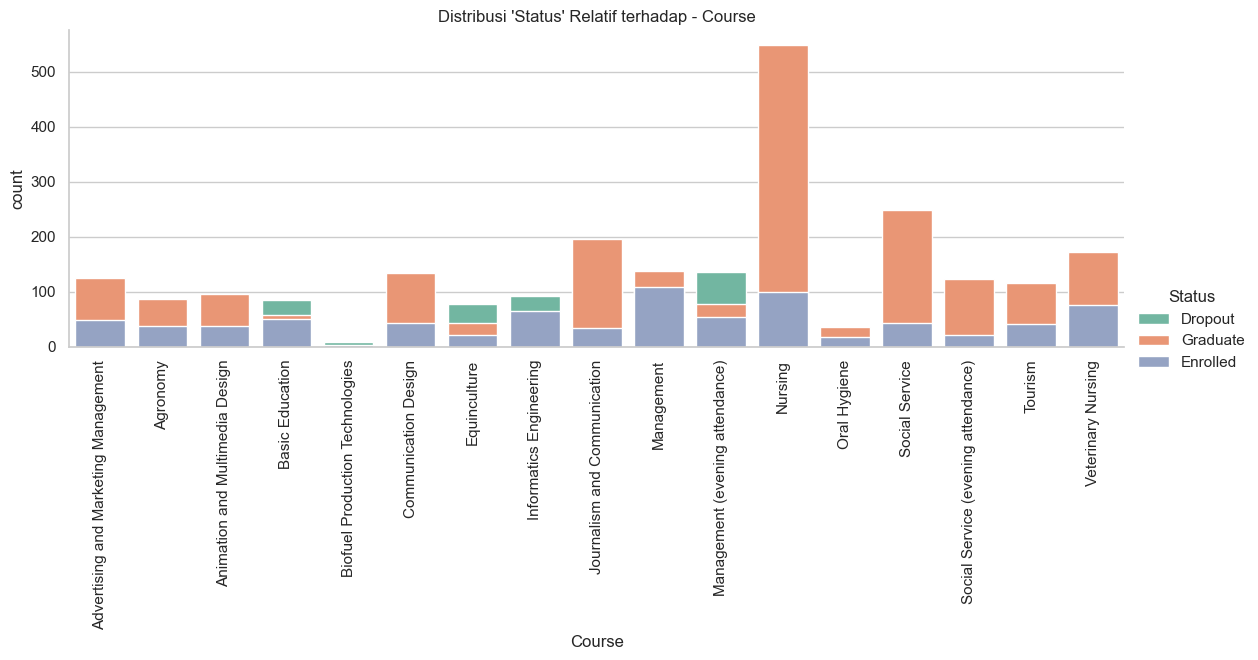

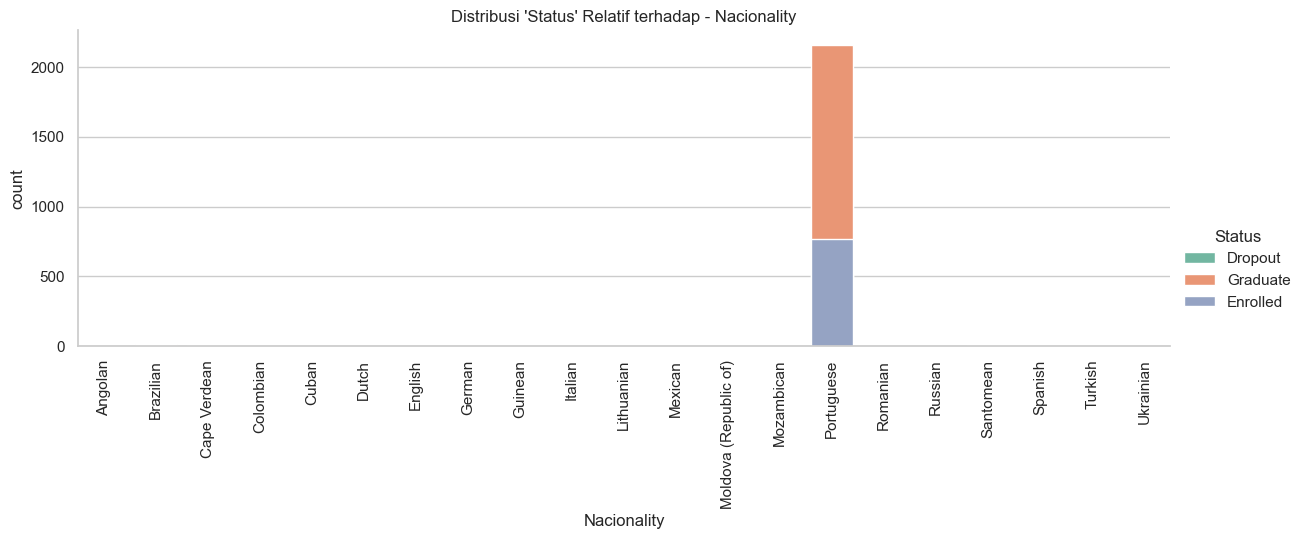

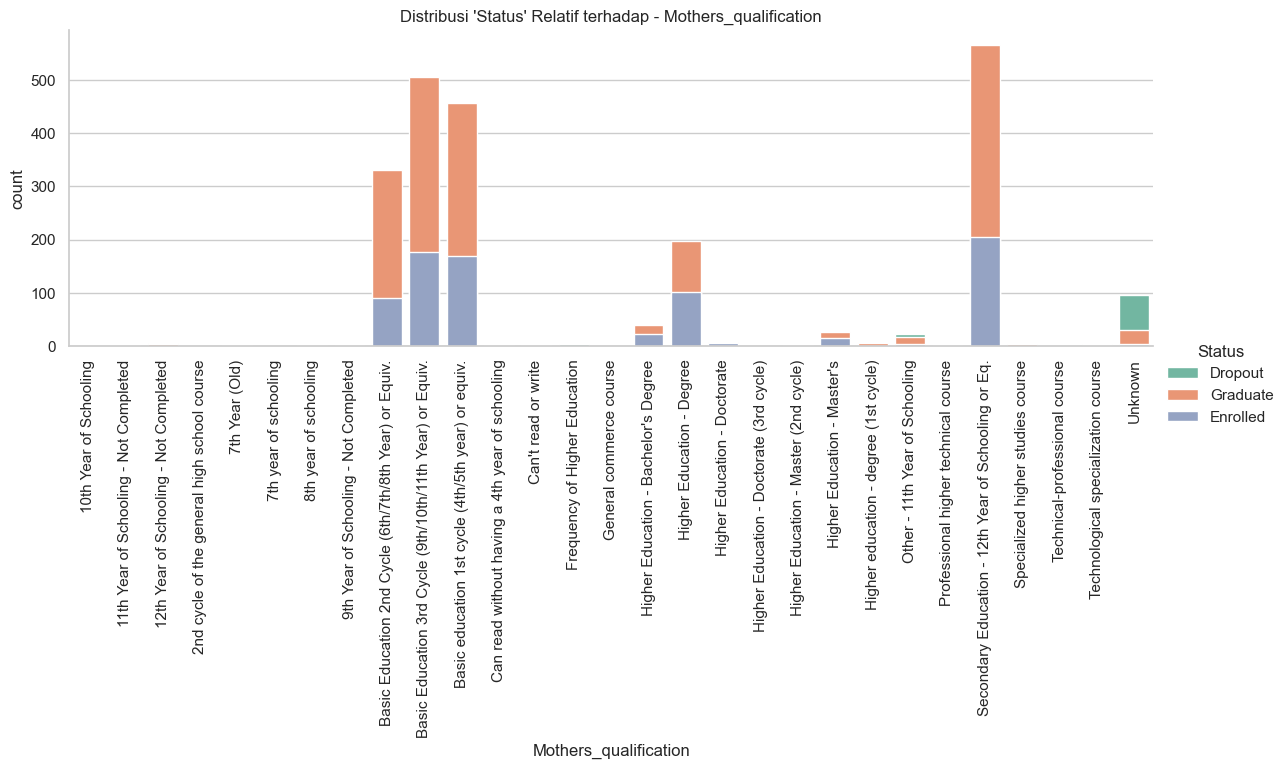

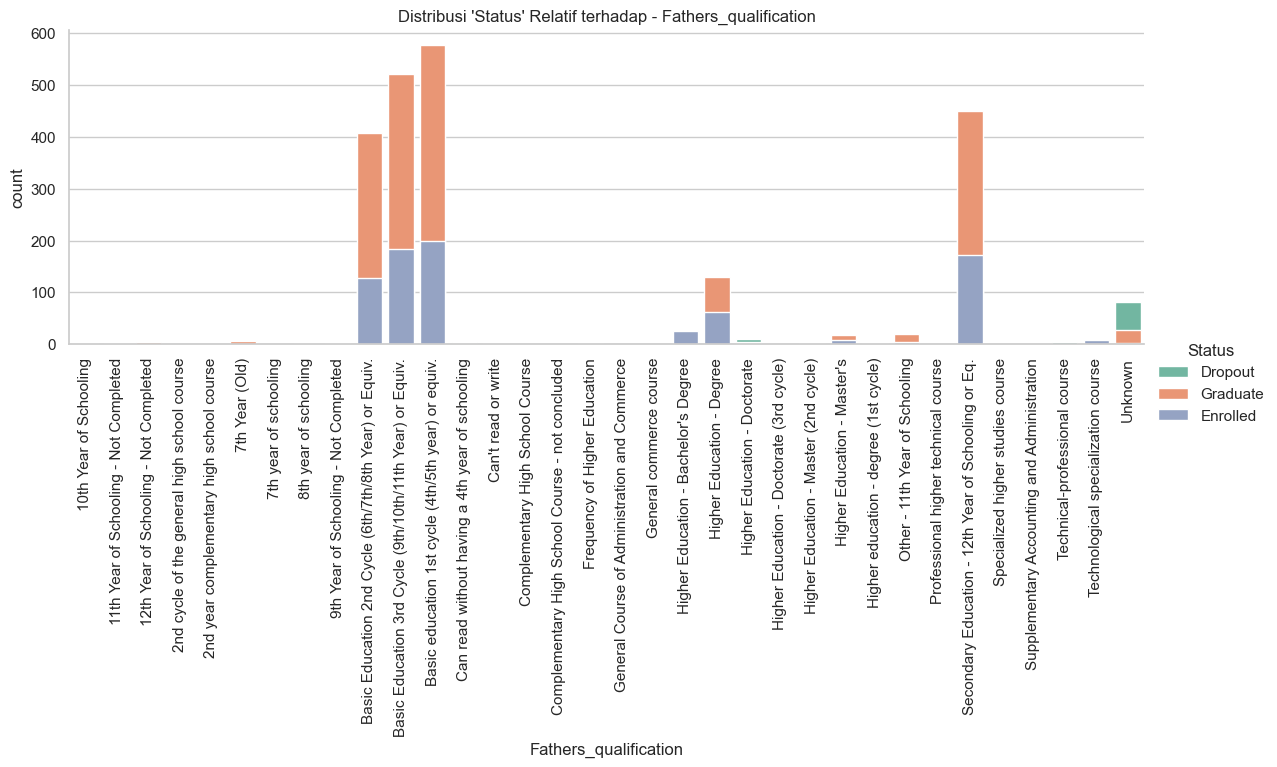

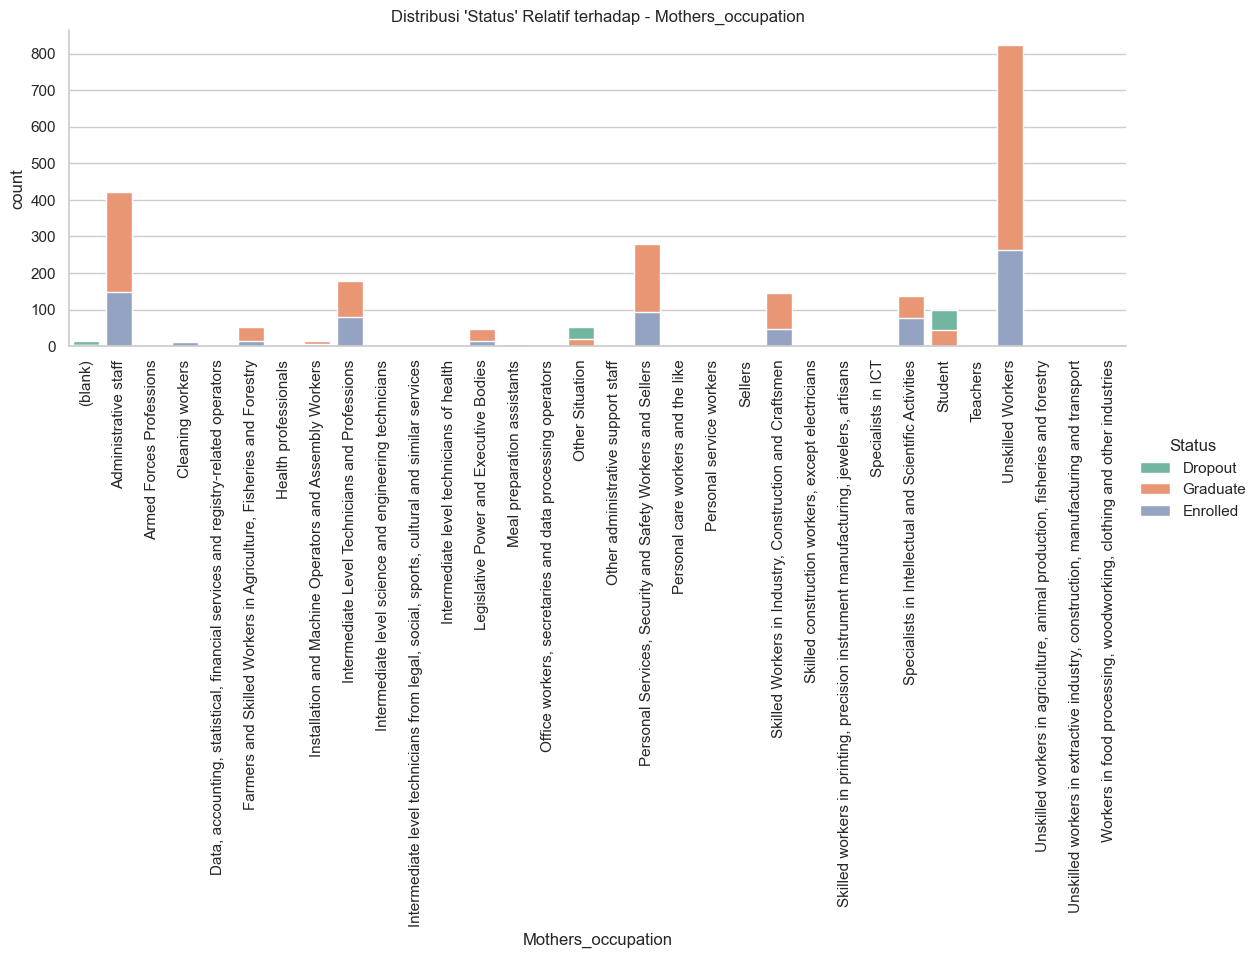

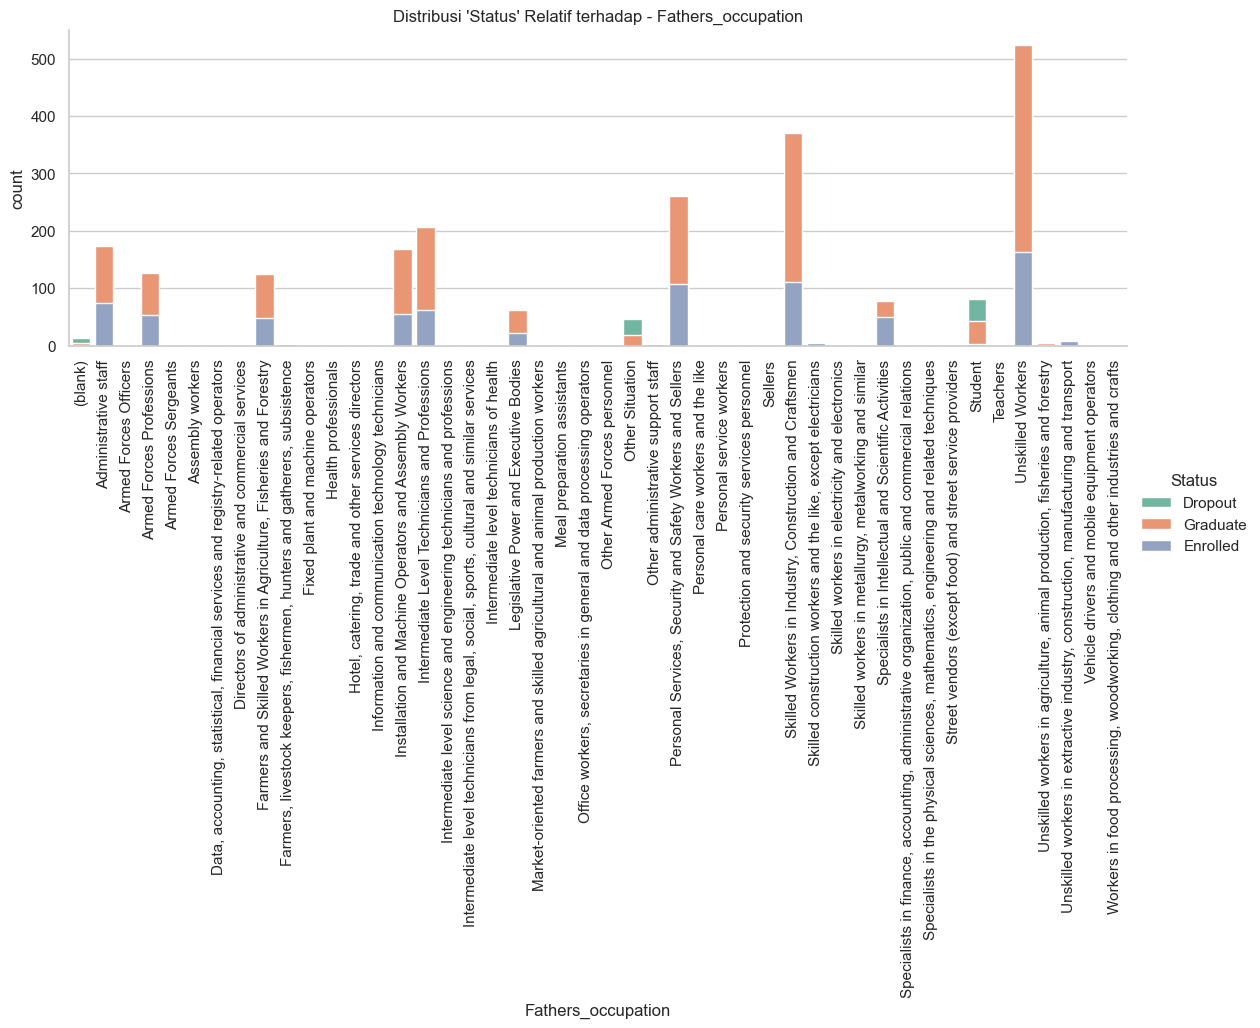

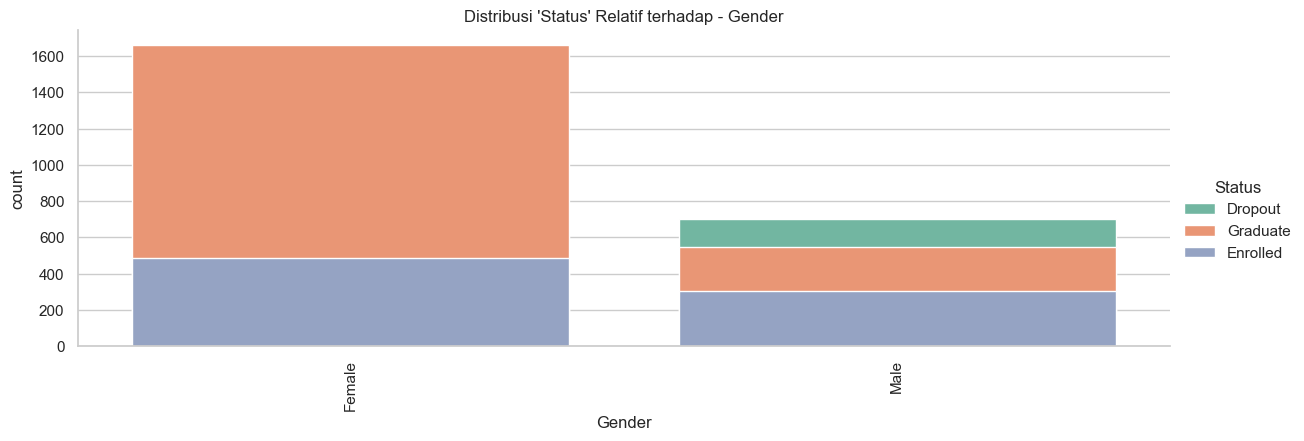

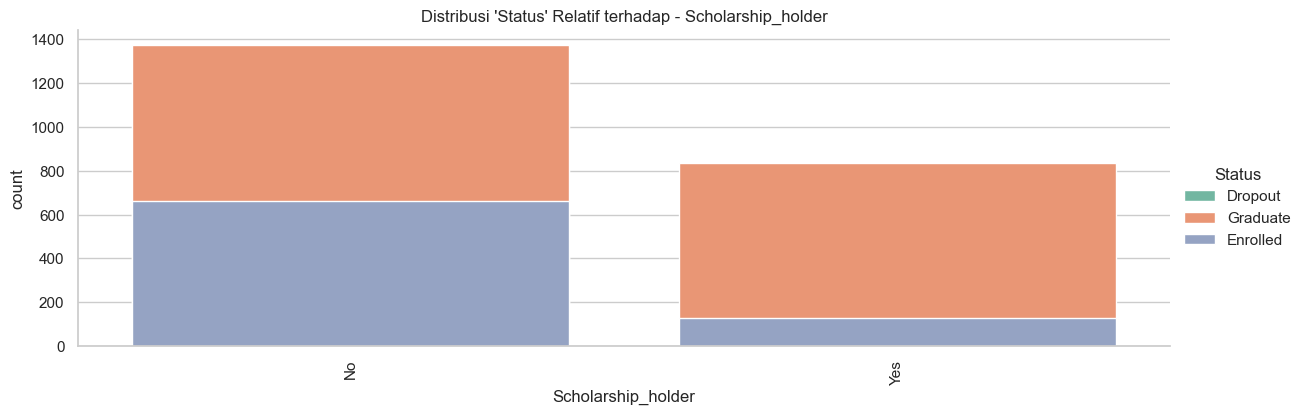

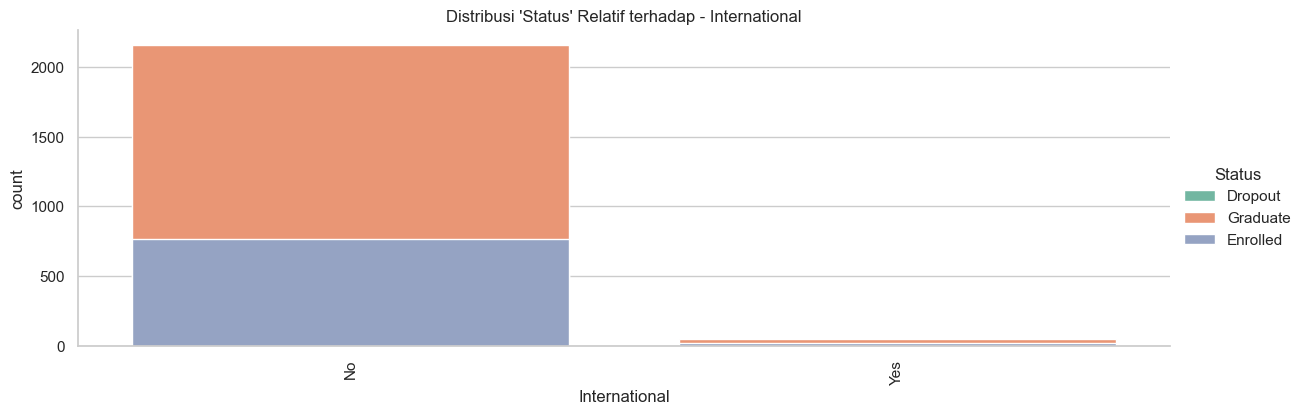

In [69]:
# Salin dataframe
df_multivariate = df.copy()

# Helper function untuk mengganti nilai numerik dengan label deskriptif
def replace_values(column, replacement_dict):
    return df_multivariate[column].replace(replacement_dict)

# Daftar kolom yang memerlukan konversi dan dictionary untuk mengganti nilainya
replacement_mappings = {
    'Marital_status': {
        1: 'Single',
        2: 'Married',
        3: 'Widower',
        4: 'Divorced',
        5: 'Facto Union',
        6: 'Legally Separated'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'Nacionality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 
        14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean', 
        24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish', 
        41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)', 
        101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 
        109: 'Colombian'
    },
    'Mothers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.', 
        2: 'Higher Education - Bachelor\'s Degree', 
        3: 'Higher Education - Degree', 
        4: 'Higher Education - Master\'s', 
        5: 'Higher Education - Doctorate', 
        6: 'Frequency of Higher Education', 
        9: '12th Year of Schooling - Not Completed', 
        10: '11th Year of Schooling - Not Completed', 
        11: '7th Year (Old)', 
        12: 'Other - 11th Year of Schooling', 
        14: '10th Year of Schooling', 
        18: 'General commerce course', 
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 
        22: 'Technical-professional course', 
        26: '7th year of schooling', 
        27: '2nd cycle of the general high school course', 
        29: '9th Year of Schooling - Not Completed', 
        30: '8th year of schooling', 
        34: 'Unknown', 
        35: 'Can\'t read or write', 
        36: 'Can read without having a 4th year of schooling', 
        37: 'Basic education 1st cycle (4th/5th year) or equiv.', 
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 
        39: 'Technological specialization course', 
        40: 'Higher education - degree (1st cycle)', 
        41: 'Specialized higher studies course', 
        42: 'Professional higher technical course', 
        43: 'Higher Education - Master (2nd cycle)', 
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Mothers_occupation': {
        0: 'Student', 1: 'Legislative Power and Executive Bodies', 
        2: 'Specialists in Intellectual and Scientific Activities', 
        3: 'Intermediate Level Technicians and Professions', 
        4: 'Administrative staff', 
        5: 'Personal Services, Security and Safety Workers and Sellers', 
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
        7: 'Skilled Workers in Industry, Construction and Craftsmen', 
        8: 'Installation and Machine Operators and Assembly Workers', 
        9: 'Unskilled Workers', 
        10: 'Armed Forces Professions', 
        90: 'Other Situation', 
        99: '(blank)', 
        122: 'Health professionals', 
        123: 'Teachers', 
        125: 'Specialists in ICT', 
        131: 'Intermediate level science and engineering technicians', 
        132: 'Intermediate level technicians of health', 
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
        141: 'Office workers, secretaries and data processing operators', 
        143: 'Data, accounting, statistical, financial services and registry-related operators', 
        144: 'Other administrative support staff', 
        151: 'Personal service workers', 
        152: 'Sellers', 
        153: 'Personal care workers and the like', 
        171: 'Skilled construction workers, except electricians', 
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans', 
        175: 'Workers in food processing, woodworking, clothing and other industries', 
        191: 'Cleaning workers', 
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 
        194: 'Meal preparation assistants'
    },
    'Fathers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.', 
        2: 'Higher Education - Bachelor\'s Degree', 
        3: 'Higher Education - Degree', 
        4: 'Higher Education - Master\'s', 
        5: 'Higher Education - Doctorate', 
        6: 'Frequency of Higher Education', 
        9: '12th Year of Schooling - Not Completed', 
        10: '11th Year of Schooling - Not Completed', 
        11: '7th Year (Old)', 
        12: 'Other - 11th Year of Schooling', 
        13: '2nd year complementary high school course', 
        14: '10th Year of Schooling', 
        18: 'General commerce course', 
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 
        20: 'Complementary High School Course', 
        22: 'Technical-professional course', 
        25: 'Complementary High School Course - not concluded', 
        26: '7th year of schooling', 
        27: '2nd cycle of the general high school course', 
        29: '9th Year of Schooling - Not Completed', 
        30: '8th year of schooling', 
        31: 'General Course of Administration and Commerce', 
        33: 'Supplementary Accounting and Administration', 
        34: 'Unknown', 
        35: 'Can\'t read or write', 
        36: 'Can read without having a 4th year of schooling', 
        37: 'Basic education 1st cycle (4th/5th year) or equiv.', 
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 
        39: 'Technological specialization course', 
        40: 'Higher education - degree (1st cycle)', 
        41: 'Specialized higher studies course', 
        42: 'Professional higher technical course', 
        43: 'Higher Education - Master (2nd cycle)', 
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Fathers_occupation': {
        0: 'Student', 
        1: 'Legislative Power and Executive Bodies', 
        2: 'Specialists in Intellectual and Scientific Activities', 
        3: 'Intermediate Level Technicians and Professions', 
        4: 'Administrative staff', 
        5: 'Personal Services, Security and Safety Workers and Sellers', 
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
        7: 'Skilled Workers in Industry, Construction and Craftsmen', 
        8: 'Installation and Machine Operators and Assembly Workers', 
        9: 'Unskilled Workers', 
        10: 'Armed Forces Professions', 
        90: 'Other Situation', 
        99: '(blank)', 
        101: 'Armed Forces Officers', 
        102: 'Armed Forces Sergeants', 
        103: 'Other Armed Forces personnel', 
        112: 'Directors of administrative and commercial services', 
        114: 'Hotel, catering, trade and other services directors', 
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques', 
        122: 'Health professionals', 
        123: 'Teachers', 
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations', 
        131: 'Intermediate level science and engineering technicians and professions', 
        132: 'Intermediate level technicians of health', 
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
        135: 'Information and communication technology technicians', 
        141: 'Office workers, secretaries in general and data processing operators', 
        143: 'Data, accounting, statistical, financial services and registry-related operators', 
        144: 'Other administrative support staff', 
        151: 'Personal service workers', 
        152: 'Sellers', 
        153: 'Personal care workers and the like', 
        154: 'Protection and security services personnel', 
        161: 'Market-oriented farmers and skilled agricultural and animal production workers', 
        163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence', 
        171: 'Skilled construction workers and the like, except electricians', 
        172: 'Skilled workers in metallurgy, metalworking and similar', 
        174: 'Skilled workers in electricity and electronics', 
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts', 
        181: 'Fixed plant and machine operators', 
        182: 'Assembly workers', 
        183: 'Vehicle drivers and mobile equipment operators', 
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 
        194: 'Meal preparation assistants', 
        195: 'Street vendors (except food) and street service providers'
    },
    'Gender': {
        1: 'Male',
        0: 'Female'
    },
    'Scholarship_holder': {
        1: 'Yes',
        0: 'No'
    },
    'International': {
        1: 'Yes',
        0: 'No'
    }
}

# Terapkan fungsi replace_values pada kolom-kolom yang relevan
for col, mapping in replacement_mappings.items():
    df_multivariate[col] = replace_values(col, mapping)

# Daftar kolom numerik yang sebenarnya bersifat kategorikal
categorical_columns = ['Marital_status', 'Course', 'Nacionality', 'Mothers_qualification', 
                       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 
                       'Gender', 'Scholarship_holder', 'International']

# Ubah kolom-kolom tersebut menjadi tipe data 'category'
for col in categorical_columns:
    df_multivariate[col] = df_multivariate[col].astype('category')

# Identifikasi semua fitur kategorikal dalam dataset
categorical_features = df_multivariate.select_dtypes(include=['category']).columns.tolist()

# Membuat plot untuk setiap fitur kategorikal relatif terhadap 'Status'
for col in categorical_features:
    sns.catplot(x=col, hue="Status", kind="count", dodge=False, height=4, aspect=3, data=df_multivariate, palette="Set2")
    plt.title("Distribusi 'Status' Relatif terhadap - {}".format(col))
    plt.xticks(rotation=90)
    plt.show()

Hasil dari kode di atas mengungkap beberapa pola menarik, seperti pada kolom marital status, yang menunjukkan bahwa individu dengan status married lebih cenderung mengalami dropout. Selain itu, tidak ditemukan kasus dropout pada individu dengan gender female.


### Correlation Matrix

Menampilkan matriks korelasi seluruh fitur dalam dataset.

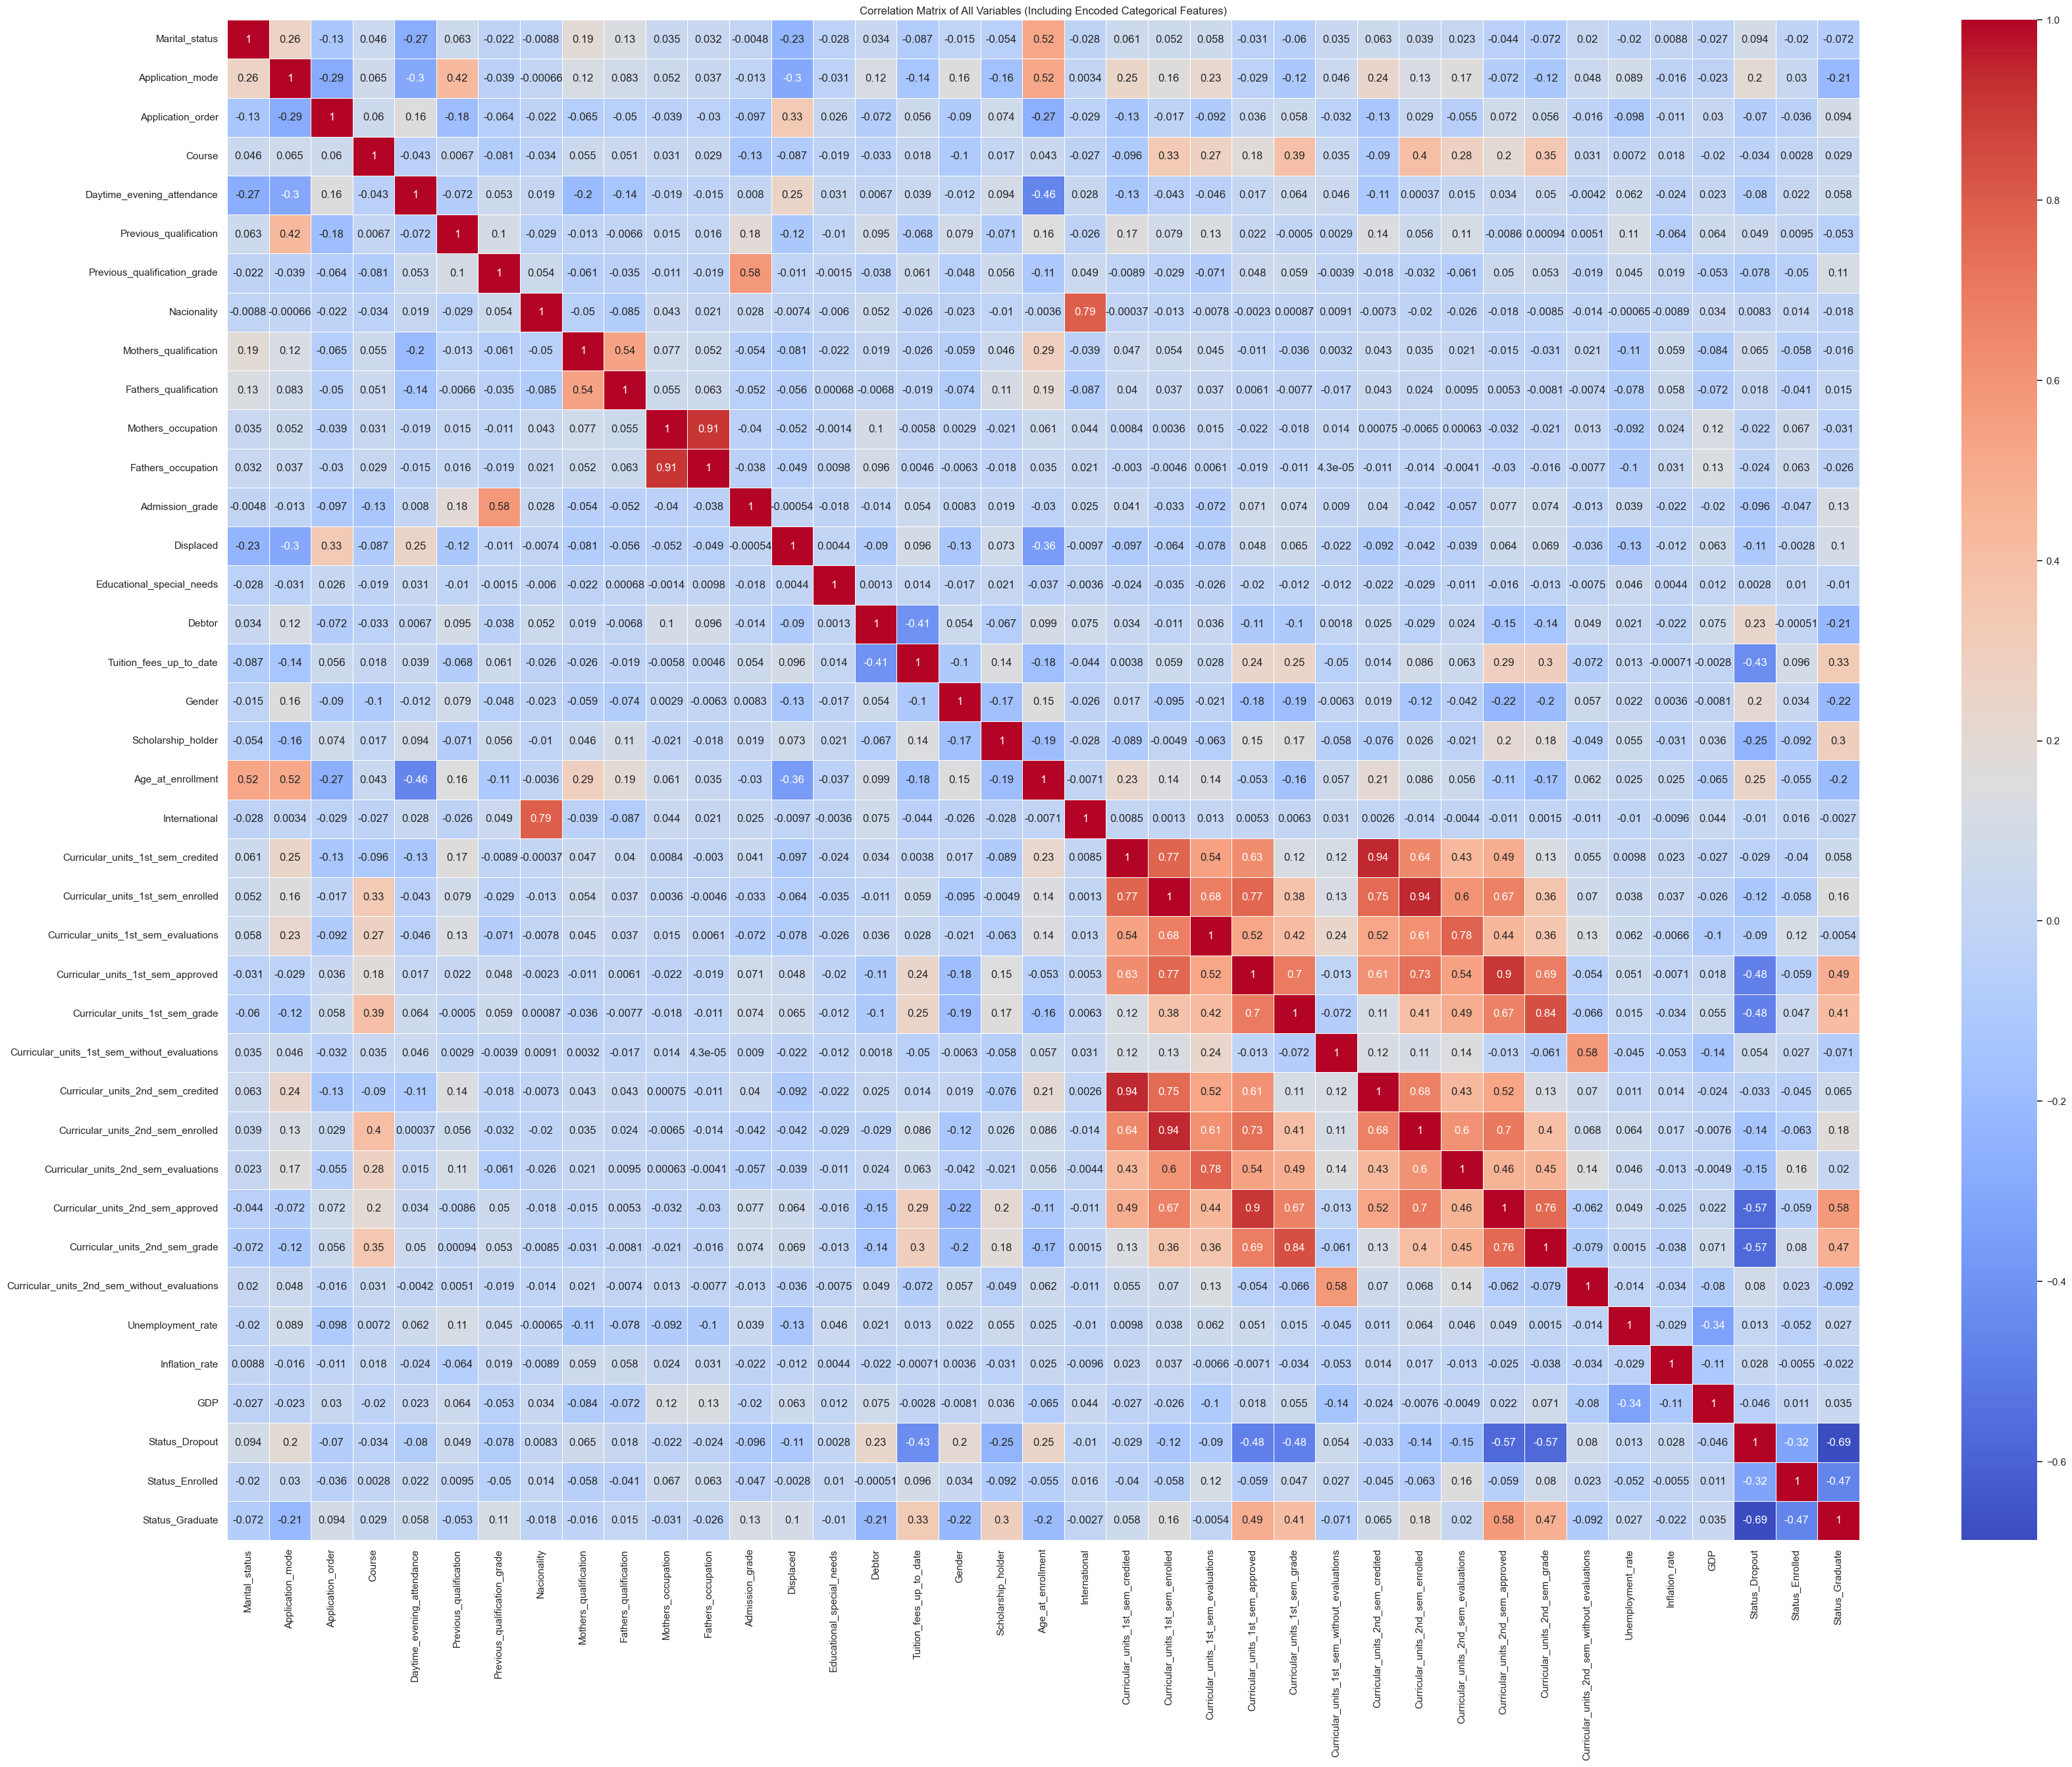

In [71]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Variables (Including Encoded Categorical Features)')
plt.show()

Kolom dengan korelasi negatif terhadap target (status) lebih banyak daripada kolom yang berkorelasi positif.

C:\Users\Ega\AppData\Local\Temp\ipykernel_17792\752378537.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapping['Status'] = df['Status'].replace(status_mapping)
C:\Users\Ega\AppData\Local\Temp\ipykernel_17792\752378537.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="Spectral")


Factors correlated with Status:
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evaluations            0.044362

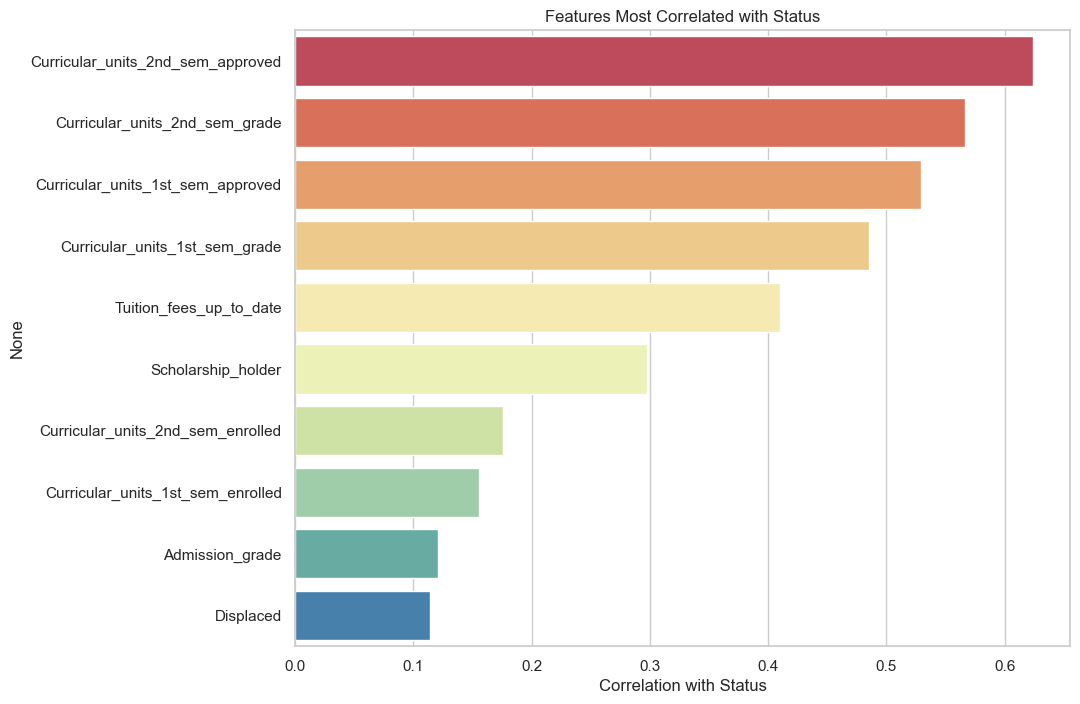

In [72]:
# Mengubah kolom target 'Status' menjadi numerik
status_mapping = {'Dropout': 0,'Enrolled':1,'Graduate': 2}
df_mapping = df.copy()
df_mapping['Status'] = df['Status'].replace(status_mapping)

# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal (kecuali kolom target 'Status')
df_encoded = pd.get_dummies(df_mapping, columns=[col for col in categorical_columns if col != 'Status'], drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan kolom 'Status'
status_correlation = correlation_matrix["Status"].sort_values(ascending=False)

factors = status_correlation
factors = factors.drop('Status')

print("Factors correlated with Status:")
print(factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="Spectral")
plt.title("Features Most Correlated with Status")
plt.xlabel("Correlation with Status")
plt.show()

Kolom Curricular_units_2nd_sem_approved memiliki korelasi paling kuat dengan kolom status.

## Data Preparation / Preprocessing

### Menduplikasi dataframe asli untuk menjaga nilai original tetap utuh.

In [73]:
# Melakukan duplikasi dataset
df_cleaned = df.copy()

Melakukan pra-pemrosesan dengan standarisasi fitur numerik dan one-hot encoding pada fitur kategorikal.

In [74]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Standardisasi fitur numerik
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# One-hot encoding untuk fitur kategorikal
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=False)

#Mengubah nilai True dan False menjadi 1 dan 0
df_cleaned = df_cleaned.astype(int)

Menyimpan objek scaler untuk digunakan di Streamlit



In [53]:
# Simpan scaler
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']

Data dibagi menjadi fitur dan target, lalu dipisahkan menjadi data latih dan data uji dengan perbandingan 80:20.

Hanya 10 fitur dengan korelasi tertinggi terhadap kolom target Status yang digunakan, yaitu:
'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', dan 'Displaced'.

Tujuan ini untuk mengoptimalkan komputasi dan meminimalkan jumlah fitur pada pembuatan prototipe.

In [75]:
# Memisahkan fitur (X) dan target (y)
X = df_cleaned.drop(['Status_Dropout','Status_Enrolled','Status_Graduate'], axis=1)
X = X[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]
y = df_cleaned[['Status_Dropout','Status_Enrolled','Status_Graduate']]

# Membagi data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Optimasi Hyperparameter Terbaik dengan GridSearchCV

In [77]:
# Melakukan grid search
rdf_model = RandomForestClassifier(random_state=123)

# Parameter grid
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [15 ,20],
    'criterion' :['gini', 'entropy']
}
 
# Grid search
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Menampilkan parameter terbaik hasil dari grid search.

In [78]:
# Menampilkan hasil grid search
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 500}


Hasil output menunjukkan bahwa kombinasi parameter terbaik yang diperoleh adalah: criterion='entropy', max_depth=15, max_features='sqrt', dan n_estimators=500.

Melatih model dengan parameter terbaik dan menyimpannya ke dalam folder model.



In [79]:
# Membuat model Random Forest Classifier dengan parameter terbaik
rdf_model = RandomForestClassifier(
    random_state=123, 
    max_depth=15, 
    n_estimators=500, 
    max_features='sqrt', 
    criterion='entropy', 
    n_jobs=-1
)
rdf_model.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=500,
                       n_jobs=-1, random_state=123)

In [80]:
# Menyimpan model
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

## Evaluation

Evaluasi model pada data uji dan menampilkan hasilnya

In [87]:
# Memprediksi pada data test
y_pred = rdf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 67.23%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74       316
           1       0.29      0.03      0.05       151
           2       0.67      0.93      0.77       418

   micro avg       0.72      0.67      0.69       885
   macro avg       0.61      0.53      0.52       885
weighted avg       0.67      0.67      0.64       885
 samples avg       0.67      0.67      0.67       885



c:\Users\Ega\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model menunjukkan tingkat akurasi yang cukup rendah, yaitu sebesar 67.23%. Hal ini kemungkinan disebabkan oleh penggunaan terlalu banyak fitur yang tidak memiliki kontribusi signifikan terhadap prediksi status dropout.

Visualisasi fitur-fitur penting yang dipakai oleh model selama proses pelatihan.

C:\Users\Ega\AppData\Local\Temp\ipykernel_17792\2950314805.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp_df, y='Feature', x='Importance', palette='viridis')


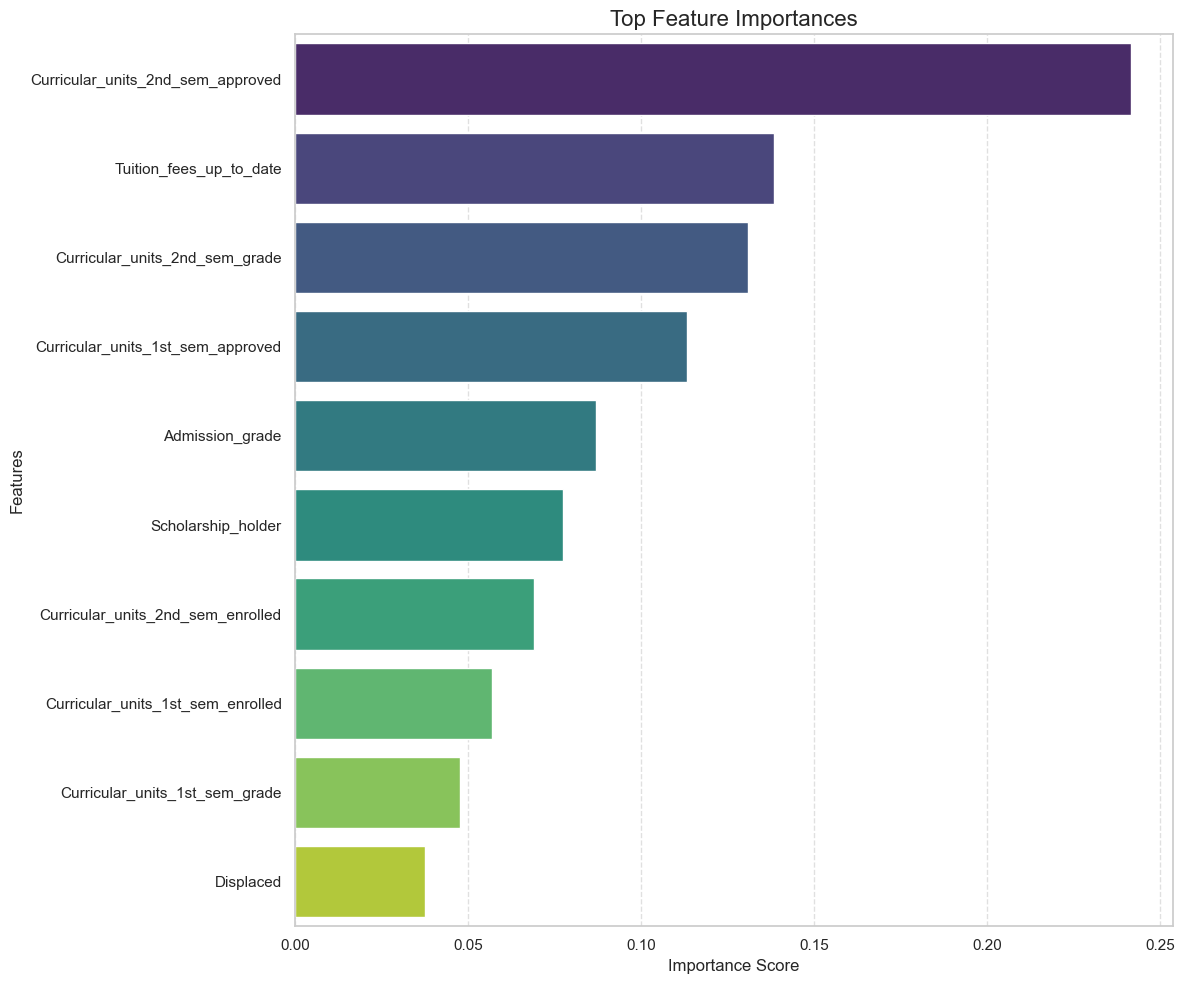

In [92]:
# Mendapatkan nilai dan nama fitur
importances = rdf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot dengan seaborn
plt.figure(figsize=(12, 10))
sns.barplot(data=feature_imp_df, y='Feature', x='Importance', palette='viridis')

plt.title("Top Feature Importances", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Hasil output menunjukkan bahwa sebagian besar fitur input yang digunakan kurang memberikan kontribusi signifikan dalam proses prediksi. Oleh karena itu, disarankan agar penelitian selanjutnya mempertimbangkan pemilihan fitur yang lebih relevan atau informatif untuk meningkatkan kinerja model.